In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def feval(t):
    return 1/(1+np.exp(-t))

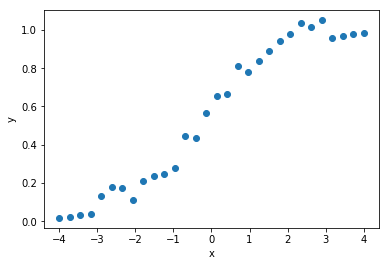

In [16]:
m = 30
x = np.linspace(-4, 4, m)
y = feval(x)
for i in range(m):
    if abs(x[i]) < 3:
        y[i] += 0.15*np.random.rand()
plt.plot(x,y,'o')
plt.xlabel('x');
plt.ylabel('y');

In [6]:
def func(n,t,coeffs):
    f = 0*t
    for i in range(n+1):
        f = f + coeffs[i]*t**i    
    return f

In [12]:
n = 6# polynomial degree
A = np.array([
    x**i
    for i in range(n+1)
    ]).T


U, sigma, VT = la.svd(A,full_matrices=False)
coeffs = VT.T@((U.T@y) / sigma)
print("sigma = ",sigma)
print(coeffs)

coeffs,residual,rank,sval = la.lstsq(A,y)
print(coeffs)

coeffs = la.solve(A.T@A,A.T@y)
print(coeffs)

print(la.cond(A))

sigma =  [  7.53476170e+03   1.98828802e+03   9.60192799e+01   3.26428520e+01
   5.95247764e+00   2.89355192e+00   2.14098618e+00]
[  5.93196455e-01   2.44186620e-01  -6.86039782e-03  -1.30789266e-02
  -2.83965123e-04   3.36281974e-04   2.08771079e-05]
[  5.93196455e-01   2.44186620e-01  -6.86039782e-03  -1.30789266e-02
  -2.83965123e-04   3.36281974e-04   2.08771079e-05]
[  5.93196455e-01   2.44186620e-01  -6.86039782e-03  -1.30789266e-02
  -2.83965123e-04   3.36281974e-04   2.08771079e-05]
3519.29488441


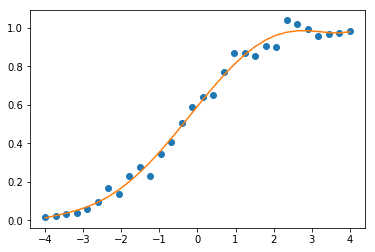

In [13]:
plt.plot(x, y, "o")
plt.plot(x,func(n,x,coeffs))